#Theoritical

###1. What is a Support Vector Machine (SVM)
Statistical supervised ML algorithm that creates an optimal boundary(hyperplane) to separate the different groups of data. It can perform both classification & regresion tasks


###2. What is the difference between Hard Margin and Soft Margin SVM
hard magin - assumes that all the data points can be properly classified, without any misclassification. Finds a hyper plane such that no misclassification is present.

soft margin - considers that some data points might not be classified correctly. uses regularization parameter C to allow some of the points to get misclassified.

Soft margin is more realistic for real time data with noise & reduces overfitting.


###3. What is the mathematical intuition behind SVM
Find the w & b such that the below equation is minimised -
1/2*∣∣𝑤∣∣**2+𝐶 𝑖=1to n ∑𝜉𝑖

where
𝑦𝑖 (𝑤⋅𝑥𝑖+𝑏)≥1  −𝜉𝑖,  𝜉𝑖≥0


###4. What is the role of Lagrange Multipliers in SVM
Langrange function is
𝐿(𝑤,𝑏,𝛼) =1/2∣∣𝑤∣∣**2 − 𝑖=1to 𝑛 ∑ 𝛼𝑖 [𝑦𝑖(𝑤⋅𝑥𝑖+𝑏)−1]

𝛼𝑖 are the lagrange multipliers

Only the data points with 𝛼𝑖>0 contribute in defining optimal hyper parameter

###5. What are Support Vectors in SVM
Support vectors are the points closest to the opposite class

###6. What is a Support Vector Classifier (SVC)
Used for classification tasks,predicts the optimal hyperplane to classify the data points. Maximizes the margin between classes.


###7. What is a Support Vector Regressor (SVR)
Used for regression tasks,predicts the optimal hyperplane to predict the continuous data points.Creates the margin of tolerance within which errors are ignored.

###8. What is the Kernel Trick in SVM
Support vector deos not work well for non linear data, kernel
 trick t=mathematically transforms the data to a higher dimension to make it lineraly separable using polynomial,rbf, sigmoid functions

###9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel

Linear kernel doesnot perform any transformation to the data,it assumes the data is linearly separable

Polynomial kernel transforms the data to a polynomial degree to make it linearly separable. if there are 2 features x1 & x2 then 5 features are created out of the 2. x1,x2,x1x2,x1**2, x2**2

RBF kernel is used for the circular kind of data & real world problems of complex dimensions using the formula pf eucleadian distance and sigma


###10. What is the effect of the C parameter in SVM
C is a hyper parameter to find the best number of mis classified data points

###11. What is the role of the Gamma parameter in RBF Kernel SVM
𝛾=1/(2𝜎**2)
High gamma is for complex patterns, low gamma is for smoother data, gamma works with c as regularization parameter


###12. What is the Naïve Bayes classifier, and why is it called "Naïve"
Machine learning algorithm for classification tasks based on Bayes theorem.
It has a naive assumption that, the features are independent of each other


###13. What is Bayes’ Theorem

P(B/A) = P(B) * P(A/B) / P(A)

###14. Explain the differences between Gaussian Naïve Bayes,
###Multinomial Naïve Bayes, and Bernoulli Naïve Bayes
Bernoulli Naïve Bayes- Features follow Bernoulli distribution/binary outcome, like Gender, Yes/No

Multinomial Naïve Bayes - Used for discrete feature data like text that can be represented as frequency or count

Gaussian Naïve Bayes - Featue follow Normal distribution, like age,salary

###15. When should you use Gaussian Naïve Bayes over other variants
When most of the featues follow Normal distribution, like age,salary

###16. What are the key assumptions made by Naïve Bayes
  - No multi collinearity
  - All features are indpendent
  - Data are present in terms of frequency


###17. What are the advantages and disadvantages of Naïve Bayes
  -Advantages
    - Good for text classification, sentiment analysis
    - Faster algorithm, based on prbability
    - Good for small data
    - Simple & can handle multi class classification
    
  -Disadvantages
    - Assumes the features are independent
    - Not valid for real time data

###18. Why is Naïve Bayes a good choice for text classification
Text words are independent of each other & often form sparse matrix.NB works well this type of data.

###19. Compare SVM and Naïve Bayes for classification tasks

SVM - Works with both numerical & categorical data, hs no assumption like independent feature. Creates margin boundaries to separate the classes.

Naive Bayes - Works best on small independent features, calcualtes the probability value for classification.

###20. How does Laplace Smoothing help in Naïve Bayes

Laplace smoothing helps in the cases of zero probability.
It ensures that no feature has zero probability


#Practical

In [ ]:
###21. Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
data = load_iris()
X = pd.DataFrame(data.data,columns = data.feature_names)
y = pd.DataFrame(data.target)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

from sklearn.svm import SVC

model = SVC()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score

acc = accuracy_score(y_pred,y_test)
print(acc)


0.9111111111111111


In [ ]:
###22. Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then
##compare their accuracies

from sklearn.datasets import load_wine

data = load_wine()

X = pd.DataFrame(data.data,columns=data.feature_names)
y = pd.DataFrame(data.target)

X_train,X_test,y_train,y_test = train_test_split(X,y)

linear_model = SVC(kernel='linear')
linear_model.fit(X_train,y_train)

linear_pred = linear_model.predict(X_test)
print(f"Linear model accuracy {accuracy_score(linear_pred,y_test)}")

rbf_model = SVC(kernel='rbf')
rbf_model.fit(X_train,y_train)
rbf_pred = rbf_model.predict(X_test)
print(f"RBF model accuracy {accuracy_score(rbf_pred,y_test)}")

Linear model accuracy 0.9111111111111111
Linear model accuracy 0.7555555555555555


In [ ]:
###23. Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean
###Squared Error (MSE)

from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X = pd.DataFrame(data.data,columns=data.feature_names)
y = data.target

from sklearn.svm import SVR
X_train,X_test,y_train,y_test = train_test_split(X,y)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = SVR(kernel='rbf',C=1.0, gamma='scale')
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error,r2_score

print(f"MSE is {mean_squared_error(y_pred,y_test)} R**2 {r2_score(y_pred=y_pred,y_true=y_test) * 100}")

MSE is 0.33005428696029904 R**2 75.0679573881344


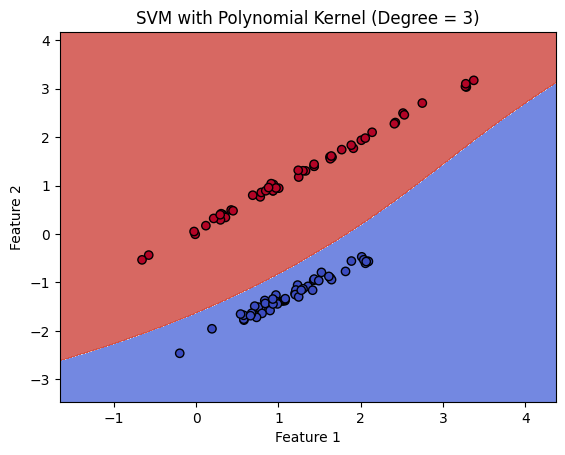

In [ ]:
###24. Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision
###boundary

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification

# Step 1: Generate synthetic 2D data
X, y = make_classification(
    n_samples=100,  # Number of samples
    n_features=2,   # Number of features
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=1.2,  # Separation between classes
    random_state=42
)

# Step 2: Train an SVM Classifier with Polynomial Kernel
model = SVC(kernel='poly', degree=3, C=1.0, random_state=42)
model.fit(X, y)

# Step 3: Create a mesh grid for decision boundary visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Step 4: Predict class for each point in the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 5: Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title("SVM with Polynomial Kernel (Degree = 3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [5]:
###25. Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and
###evaluate accuracy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn

warnings.filterwarnings('ignore')

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data,columns = data.feature_names)
y = pd.DataFrame(data.target)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print(f"Accuracy {accuracy_score(y_pred,y_test)}")


Accuracy 0.9181286549707602


In [6]:
###26. Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20
###Newsgroups dataset.

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

newsgroups = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

print("Categories:", newsgroups.target_names)
print("Number of samples:", len(newsgroups.data))

X_train, X_test, y_train, y_test = train_test_split(
    newsgroups.data, newsgroups.target, test_size=0.3, random_state=42
)

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

y_pred = classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

new_text = ["This is an example of artificial intelligence and machine learning."]
new_text_tfidf = vectorizer.transform(new_text)
predicted_category = classifier.predict(new_text_tfidf)
print("Predicted category:", newsgroups.target_names[predicted_category[0]])


Categories: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
Number of samples: 18846
Accuracy: 0.8464803678811461

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       236
           1       0.67      0.81      0.74       287
           2       0.77      0.80      0.78       290
           3       0.66      0.75      0.71       285
           4       0.86      0.79      0.82       312
           5       0.87      0.83      0.85       308
           6       0.79      0.80      0.80       276
           7       0.87      0.90      0.89       304
           8       0.89     

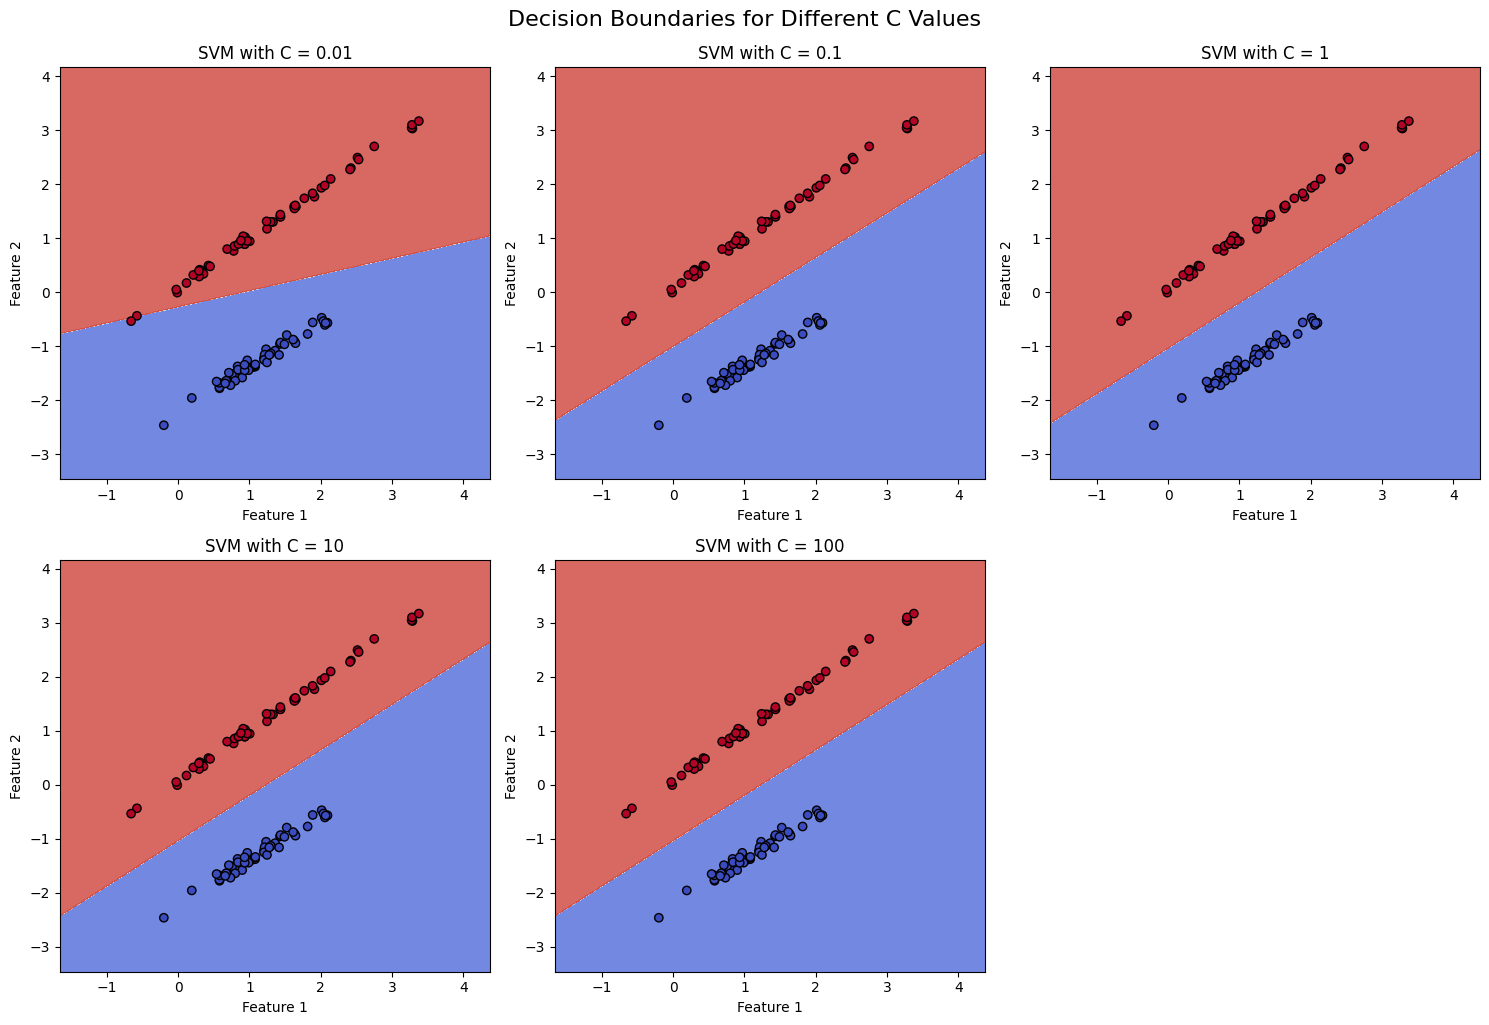

In [ ]:
###27 Write a Python program to train an SVM Classifier with different C values and compare the decision
###boundaries visually

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification

# Step 1: Generate a synthetic 2D dataset
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=1.2,
    random_state=42
)

# Step 2: Define different C values to compare
C_values = [0.01, 0.1, 1, 10, 100]

# Step 3: Visualize decision boundaries for each C value
plt.figure(figsize=(15, 10))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

for i, C in enumerate(C_values, 1):
    # Train the SVM Classifier with the current C value
    model = SVC(kernel='linear', C=C, random_state=42)
    model.fit(X, y)

    # Predict on the mesh grid for decision boundary visualization
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.subplot(2, 3, i)  # Arrange plots in a grid (2 rows, 3 columns)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title(f"SVM with C = {C}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

# Add a general title for the figure
plt.tight_layout()
plt.suptitle("Decision Boundaries for Different C Values", y=1.02, fontsize=16)
plt.show()


In [10]:
###28. Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with
###binary features

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

X, y = make_classification(
    n_samples=1000, n_features=10, n_informative=5, n_redundant=0,
    n_classes=2, n_clusters_per_class=1, flip_y=0.03, random_state=42
)

import numpy as np
X = (X > 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

classifier = BernoulliNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

new_input = np.array([[1, 0, 1, 1, 0, 1, 0, 0, 1, 0]])  # Example binary feature vector
prediction = classifier.predict(new_input)
print("Predicted class for new input:", prediction[0])

Accuracy: 0.9266666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       146
           1       0.96      0.89      0.93       154

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

Predicted class for new input: 1


In [ ]:
###29. Write a Python program to apply feature scaling before training an SVM model and compare results with
###unscaled data

from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X = pd.DataFrame(data.data,columns=data.feature_names)
y = data.target

from sklearn.svm import SVR
X_train,X_test,y_train,y_test = train_test_split(X,y)

from sklearn.preprocessing import StandardScaler

model = SVR(kernel='rbf',C=1.0, gamma='scale')
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error,r2_score

print("Before Scaling")
print(f"MSE is {mean_squared_error(y_pred,y_test)} R**2 {r2_score(y_pred=y_pred,y_true=y_test) * 100}")

### WITH SCALING

data = fetch_california_housing()
X = pd.DataFrame(data.data,columns=data.feature_names)
y = data.target

X_train,X_test,y_train,y_test = train_test_split(X,y)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = SVR(kernel='rbf',C=1.0, gamma='scale')
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error,r2_score
print("After Scaling")
print(f"MSE is {mean_squared_error(y_pred,y_test)} R**2 {r2_score(y_pred=y_pred,y_true=y_test) * 100}")

Before Scaling
MSE is 1.382920200544559 R**2 -3.300074097695971
After Scaling
MSE is 0.36451501329304486 R**2 72.753479837787


In [11]:
###30. Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and
###after Laplace Smoothing

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

X, y = make_classification(
    n_samples=1000, n_features=5, n_informative=3, n_redundant=0,
    n_classes=2, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

gnb_default = GaussianNB()
gnb_default.fit(X_train, y_train)
y_pred_default = gnb_default.predict(X_test)

accuracy_default = accuracy_score(y_test, y_pred_default)
print("Accuracy without smoothing:", accuracy_default)
print("\nClassification Report (Default):\n", classification_report(y_test, y_pred_default))

import numpy as np

X_train_smoothed = X_train + np.random.normal(0, 0.1, X_train.shape)
X_test_smoothed = X_test + np.random.normal(0, 0.1, X_test.shape)

gnb_smoothed = GaussianNB()
gnb_smoothed.fit(X_train_smoothed, y_train)
y_pred_smoothed = gnb_smoothed.predict(X_test_smoothed)

accuracy_smoothed = accuracy_score(y_test, y_pred_smoothed)
print("Accuracy with smoothing:", accuracy_smoothed)
print("\nClassification Report (Smoothed):\n", classification_report(y_test, y_pred_smoothed))

Accuracy without smoothing: 0.93

Classification Report (Default):
               precision    recall  f1-score   support

           0       0.94      0.91      0.92       138
           1       0.92      0.95      0.94       162

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

Accuracy with smoothing: 0.9233333333333333

Classification Report (Smoothed):
               precision    recall  f1-score   support

           0       0.93      0.90      0.92       138
           1       0.92      0.94      0.93       162

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [ ]:
###31. Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C,
###gamma, kernel)

data = load_iris()
X = pd.DataFrame(data.data,columns = data.feature_names)
y = pd.DataFrame(data.target)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param ={
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']
}
model = GridSearchCV(SVC(),param_grid=param,verbose=0,scoring='accuracy',cv=5)
model.fit(X_train,y_train)

print(model.best_estimator_)
print(model.best_score_)
print(model.best_params_)

y_pred = model.best_estimator_.predict(X_test)

from sklearn.metrics import accuracy_score

acc = accuracy_score(y_pred,y_test)
print(acc)

SVC(C=1, gamma=0.1)
0.9904761904761905
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.9333333333333333


In [ ]:
###32. Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and
###check it improve accuracy

from sklearn.datasets import make_classification

X,y = make_classification(
    n_classes=2,
    n_redundant=0,
    n_features=4,
    weights=[0.8,0.2]
)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

from sklearn.svm import SVC

model = SVC(kernel='rbf')
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(f"model accuracy without weightage {accuracy_score(y_pred,y_test)}")

model = SVC(kernel='rbf',class_weight='balanced')
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(f"model accuracy with weightage {accuracy_score(y_pred,y_test)}")

model accuracy without weightage 0.9333333333333333
model accuracy with weightage 0.9


In [ ]:
###33. Write a Python program to implement a Naïve Bayes classifier for spam detection using email data

# Import required libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

##Copied data
data = [
    ("Free entry in 2 a weekly competition to win FA Cup tickets", "spam"),
    ("Hi John, can we reschedule our meeting to tomorrow?", "ham"),
    ("Congratulations, you won a lottery of $1,000,000!", "spam"),
    ("Don't forget to submit your assignment before the deadline.", "ham"),
    ("Get cheap medications without a prescription.", "spam"),
    ("Please find the attached report for your review.", "ham")
]

texts, labels = zip(*data)

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(texts)

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

new_email = ["Congratulations! You've been selected for a free cruise."]
new_email_vectorized = vectorizer.transform(new_email)
prediction = classifier.predict(new_email_vectorized)
print("Prediction for new email:", prediction[0])  # 'spam' or 'ham'

In [13]:
###34. Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and
###compare their accuracy

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data,columns = data.feature_names)
y = pd.DataFrame(data.target)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

from sklearn.svm import SVC

kernel =['linear','poly','rbf']

for k in kernel:
  model = SVC(kernel=k)
  model.fit(X_train,y_train)

  y_pred = model.predict(X_test)

  from sklearn.metrics import accuracy_score

  acc = accuracy_score(y_pred,y_test)
  print(f"Accuracy for SVM- {k} is {acc}")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn

warnings.filterwarnings('ignore')

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data,columns = data.feature_names)
y = pd.DataFrame(data.target)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print(f"Accuracy for Gausian Naive Bayes {accuracy_score(y_pred,y_test)}")

Accuracy for linear is 0.9649122807017544
Accuracy for poly is 0.9239766081871345
Accuracy for rbf is 0.9298245614035088
Accuracy 0.935672514619883


In [15]:
###35.  Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare
###results

# Import required libraries
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

newsgroups = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    newsgroups.data, newsgroups.target, test_size=0.3, random_state=42
)

vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

classifier_no_fs = MultinomialNB()
classifier_no_fs.fit(X_train_tfidf, y_train)
y_pred_no_fs = classifier_no_fs.predict(X_test_tfidf)

accuracy_no_fs = accuracy_score(y_test, y_pred_no_fs)
print("Accuracy without feature selection:", accuracy_no_fs)
print("\nClassification Report (Without Feature Selection):\n", classification_report(y_test, y_pred_no_fs))

k = 2000  # Number of top features to select
selector = SelectKBest(chi2, k=k)
X_train_selected = selector.fit_transform(X_train_tfidf, y_train)
X_test_selected = selector.transform(X_test_tfidf)

classifier_fs = MultinomialNB()
classifier_fs.fit(X_train_selected, y_train)
y_pred_fs = classifier_fs.predict(X_test_selected)

accuracy_fs = accuracy_score(y_test, y_pred_fs)
print("Accuracy with feature selection (top {} features):".format(k), accuracy_fs)
print("\nClassification Report (With Feature Selection):\n", classification_report(y_test, y_pred_fs))


Accuracy without feature selection: 0.863282631765122

Classification Report (Without Feature Selection):
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       236
           1       0.76      0.83      0.79       287
           2       0.79      0.83      0.81       290
           3       0.66      0.80      0.72       285
           4       0.88      0.80      0.84       312
           5       0.91      0.86      0.88       308
           6       0.81      0.78      0.79       276
           7       0.91      0.92      0.92       304
           8       0.91      0.93      0.92       279
           9       0.95      0.94      0.94       308
          10       0.91      0.97      0.94       309
          11       0.94      0.95      0.95       290
          12       0.88      0.75      0.81       304
          13       0.95      0.90      0.92       300
          14       0.91      0.95      0.93       297
          15       0.74     

In [ ]:
###36. Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO)
###strategies on the Wine dataset and compare their accuracy

from sklearn.datasets import load_wine
from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier
data = load_wine()

X = pd.DataFrame(data.data,columns=data.feature_names)
y = pd.DataFrame(data.target)

X_train,X_test,y_train,y_test = train_test_split(X,y)

ovr_model = OneVsRestClassifier(SVC(kernel='linear'))
ovr_model.fit(X_train,y_train)

ovr_pred = linear_model.predict(X_test)
print(f"OVR model accuracy {accuracy_score(ovr_pred,y_test)}")

ovo_model = OneVsOneClassifier(SVC(kernel='rbf'))
ovo_model.fit(X_train,y_train)
ovo_pred = rbf_model.predict(X_test)
print(f"OVO model accuracy {accuracy_score(ovo_pred,y_test)}")

OVR model accuracy 0.9555555555555556
OVO model accuracy 0.6666666666666666


In [14]:
###37. Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast
###Cancer dataset and compare their accuracy


from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data,columns = data.feature_names)
y = pd.DataFrame(data.target)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

from sklearn.svm import SVC

kernel =['linear','poly','rbf']

for k in kernel:
  model = SVC(kernel=k)
  model.fit(X_train,y_train)

  y_pred = model.predict(X_test)

  from sklearn.metrics import accuracy_score

  acc = accuracy_score(y_pred,y_test)
  print(f"Accuracy for {k} is {acc}")

Accuracy for linear is 0.9473684210526315
Accuracy for poly is 0.9005847953216374
Accuracy for rbf is 0.9064327485380117


In [ ]:
###38. Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the
##average accuracy

from sklearn.datasets import load_breast_cancer
data = load_iris()
X = pd.DataFrame(data.data,columns = data.feature_names)
y = pd.DataFrame(data.target)

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

sfk = StratifiedKFold(shuffle=True,n_splits=5)
accuracy=[]
for train_index,test_index in sfk.split(X,y):
  X_train,X_test = X.iloc[train_index],X.iloc[test_index]
  y_train,y_test = y.iloc[train_index],y.iloc[test_index]

  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  acc = accuracy_score(y_pred,y_test)
  print(f"Accuracy is {acc}")
  accuracy.append(acc)

print(f"Average accuracy is {np.mean(acc)}")

Accuracy is 1.0
Accuracy is 0.9666666666666667
Accuracy is 1.0
Accuracy is 0.9333333333333333
Accuracy is 0.9666666666666667
Average accuracy is 0.9666666666666667


In [9]:
###39. Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare
##performance

# Import required libraries
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

newsgroups = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    newsgroups.data, newsgroups.target, test_size=0.3, random_state=42
)

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Uniform priors: Equal probability for all classes
uniform_priors = np.full(len(newsgroups.target_names), 1 / len(newsgroups.target_names))

skewed_priors = np.zeros(len(newsgroups.target_names))
skewed_priors[:len(newsgroups.target_names) // 2] = 0.8 / (len(newsgroups.target_names) // 2)
skewed_priors[len(newsgroups.target_names) // 2:] = 0.2 / (len(newsgroups.target_names) // 2)

default_nb = MultinomialNB()
default_nb.fit(X_train_tfidf, y_train)
default_predictions = default_nb.predict(X_test_tfidf)
default_accuracy = accuracy_score(y_test, default_predictions)
print("Default Priors Accuracy:", default_accuracy)

uniform_nb = MultinomialNB(class_prior=uniform_priors)
uniform_nb.fit(X_train_tfidf, y_train)
uniform_predictions = uniform_nb.predict(X_test_tfidf)
uniform_accuracy = accuracy_score(y_test, uniform_predictions)
print("Uniform Priors Accuracy:", uniform_accuracy)

skewed_nb = MultinomialNB(class_prior=skewed_priors)
skewed_nb.fit(X_train_tfidf, y_train)
skewed_predictions = skewed_nb.predict(X_test_tfidf)
skewed_accuracy = accuracy_score(y_test, skewed_predictions)
print("Skewed Priors Accuracy:", skewed_accuracy)

print("\nClassification Report with Skewed Priors:\n", classification_report(y_test, skewed_predictions))


Default Priors Accuracy: 0.8464803678811461
Uniform Priors Accuracy: 0.8533781393703572
Skewed Priors Accuracy: 0.7783869826671383

Classification Report with Skewed Priors:
               precision    recall  f1-score   support

           0       0.56      0.96      0.71       236
           1       0.56      0.83      0.67       287
           2       0.72      0.80      0.76       290
           3       0.57      0.76      0.65       285
           4       0.76      0.81      0.78       312
           5       0.81      0.84      0.82       308
           6       0.69      0.82      0.75       276
           7       0.70      0.92      0.80       304
           8       0.77      0.92      0.84       279
           9       0.76      0.97      0.85       308
          10       1.00      0.84      0.92       309
          11       0.98      0.83      0.90       290
          12       0.99      0.31      0.47       304
          13       0.98      0.61      0.75       300
          14  

In [ ]:
###40. Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and
###compare accuracy

from sklearn.datasets import load_breast_cancer
data = load_iris()
X = pd.DataFrame(data.data,columns = data.feature_names)
y = pd.DataFrame(data.target)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

from sklearn.svm import SVC
from sklearn.feature_selection import RFE
model_list = [
    SVC(kernel='linear'),
    RFE(estimator=SVC(kernel='linear'),n_features_to_select=3)
  ]

for model in model_list:
  model.fit(X_train,y_train)

  y_pred = model.predict(X_test)

  from sklearn.metrics import accuracy_score

  acc = accuracy_score(y_pred,y_test)
  print(f"Accuracy is {acc}")

Accuracy is 0.9777777777777777
Accuracy is 0.9555555555555556


In [ ]:
###41. Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and
###F1-Score instead of accuracy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data,columns = data.feature_names)
df['target'] = pd.DataFrame(data.target)
df= df[df['target']!=2]

X= df.iloc[:,:-1]
y = df.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

from sklearn.svm import SVC

model = SVC()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import precision_score, recall_score,f1_score
print(f"precision_score {precision_score(y_pred,y_test)} recall_score{recall_score (y_pred,y_test)} f1_score {f1_score(y_pred,y_test)}")

precision_score 1.0 recall_score1.0 f1_score 1.0


In [8]:
###42. Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss
##(Cross-Entropy Loss)


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn

warnings.filterwarnings('ignore')

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data,columns = data.feature_names)
y = pd.DataFrame(data.target)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import log_loss
print(f"Accuracy {log_loss(y_pred,y_test)}")

Accuracy 3.161723981501505


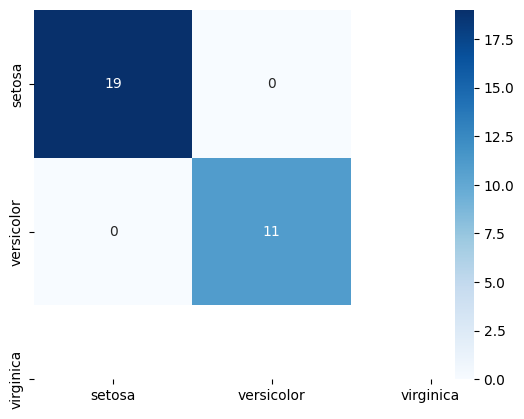

In [ ]:
###43. Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data,columns = data.feature_names)
df['target'] = pd.DataFrame(data.target)
df= df[df['target']!=2]

X= df.iloc[:,:-1]
y = df.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

from sklearn.svm import SVC

model = SVC()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_pred,y_test, labels=np.unique(y))
sns.heatmap(data=conf,annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.show()

In [ ]:
###44.  Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute
###Error (MAE) instead of MSE

from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X = pd.DataFrame(data.data,columns=data.feature_names)
y = data.target

from sklearn.svm import SVR
X_train,X_test,y_train,y_test = train_test_split(X,y)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = SVR(kernel='rbf',C=1.0, gamma='scale')
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error,r2_score

print(f"MAE is {mean_absolute_error(y_pred,y_test)} R**2 {r2_score(y_pred=y_pred,y_true=y_test) * 100}")

MAE is 0.3856400665927721 R**2 73.54271759845633


In [7]:
###45. Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC
###score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn

warnings.filterwarnings('ignore')

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data,columns = data.feature_names)
y = pd.DataFrame(data.target)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import roc_auc_score
print(f"Accuracy {roc_auc_score(y_pred,y_test)}")

Accuracy 0.9219560573695453


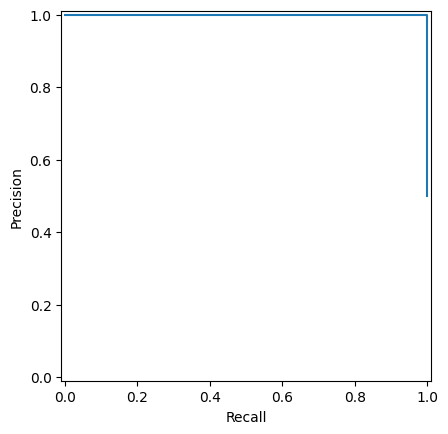

In [ ]:
###46.  Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data,columns = data.feature_names)
df['target'] = pd.DataFrame(data.target)
df= df[df['target']!=2]

X= df.iloc[:,:-1]
y = df.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

from sklearn.svm import SVC

model = SVC(kernel='rbf',probability=True)
model.fit(X_train,y_train)

y_score = model.decision_function(X_test)

from sklearn.metrics import precision_recall_curve,PrecisionRecallDisplay

precision,recall,_ = precision_recall_curve(y_test,y_score)
disp = PrecisionRecallDisplay(precision,recall)

disp.plot()
plt.show()